## Introduction
#### We will go deeper into the NumPy library for array computing.
#### More internal details about ndarray type and advanced array manipulations and algorithms.

## ndarray Object Internals
#### The NumPy ndarray provides way to interpret block of homogenous data (continous or strided) as multi-dimensional array object.
#### The data-type (dtype) determines how data is interpreted (floating point, integer, boolean, etc.)

#### ndarray is flexible because every array object is a 'strided' view on a block of data. eg - arr[::2, ::-1] does not copy the data.
#### ndarray is more than just chunk of memory and a dtype, it also has striding information. This allows array to move through memory with varying step sizes.
#### Internally, ndarray consists of the following:
####     1. Pointer to data i.e. block of RAM or memory-mapped file
####     2. Data type or dtype, describing fixed-size value cells in array
####     3. Tuple indicating array's 'shape'
####     4. A tuple of strides, integers indicating number of 'steps' to advance to the next element.

### Image of ndarray internal structure

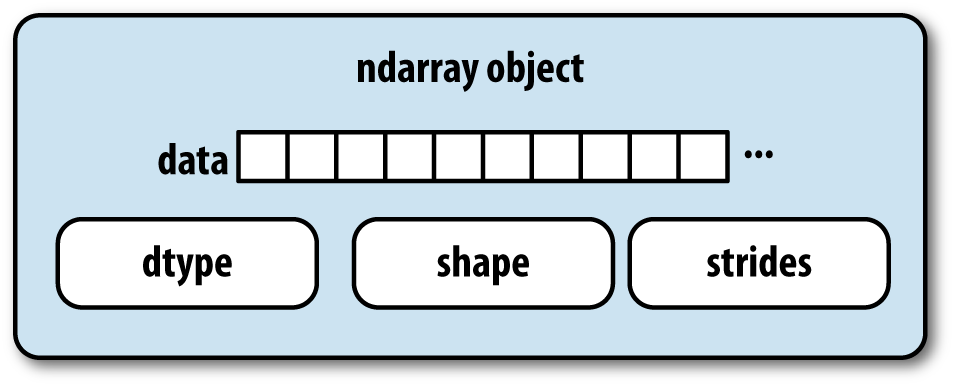

In [8]:
from IPython.display import Image

Image("images/ndarrayInnards.png", width=1000, height=1000)

#### A 10 * 5 array would have shape (10, 5).
#### A typical order of 3 * 4 * 5 array of float64(8-byte) has strides (160, 40, 8). The larger the strides along an axis, the costlier to perform computation along it.
#### Knowing strides is critical ingredient in constructing 'zero-copy' array views. Strides can be negative, enabling to move backward through memory. eg - obj[:, ::-1]

In [11]:
import numpy as np

np.ones((10, 5)).shape

(10, 5)

In [12]:
np.ones((3, 4, 5), dtype=np.float64).strides

(160, 40, 8)

### NumPy dtype Hierarchy
#### You may need to check if array contains integers, float, strings, etc.
#### There are multiples of floating-point numbers (float16 through float128). So checking a dtype would be very verbose.
#### For this reason, dtypes have superclasses (eg - np.integer, np.floating) which can be used in conjunction with 'np.issubdtype' function.
#### To know parent classes of specific dtype, call the type's 'mro' method.

In [15]:
ints = np.ones(10, dtype=np.uint16)

floats = np.ones(10, dtype=np.float32)

np.issubdtype(ints.dtype, np.integer)

True

In [16]:
np.issubdtype(floats.dtype, np.floating)

True

In [17]:
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

In [18]:
np.issubdtype(ints.dtype, np.number)

True

### Graph of dtype hierarchy

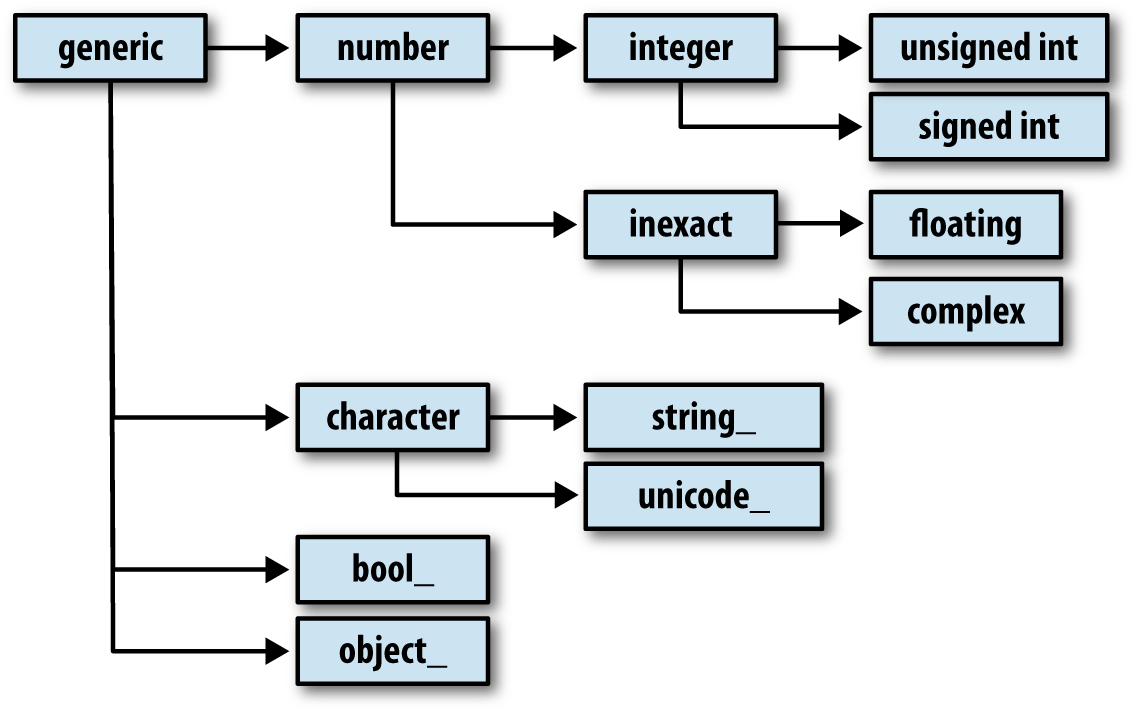

In [19]:
Image("images/dtypeHierarchy.png", width=1000, height=1000)

## Advanced Array Manipulation
#### There are many ways to work with arrays other than indexing, slicing, etc.
#### Much of the heavy-lifting for data analysis is handled by higher-level functions.
#### But at some point you may need to write an algorithm that is not existing in any library.

### Reshaping Arrays
#### In most cases, we can convert an array from one shape to another without copying data. Pass a tuple indicating new shape to 'reshape' instance method.
#### A multidimensional array can also be reshaped. If we pass -1 to a shape dimension, the value used for that dimension will be inferred from data.
#### As array's shape is a tuple, it can be passed to 'reshape' too.

In [23]:
arr = np.arange(8)
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [24]:
arr.reshape((4, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [25]:
arr.reshape((4, 2)).reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [26]:
arr = np.arange(15)
arr.reshape((5, -1))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [27]:
other_arr = np.ones((3, 5))
other_arr.shape

(3, 5)

In [28]:
arr.reshape(other_arr.shape)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

#### The opposite operation to reshape , from 1-dimensional to higher, is known as 'flattening' or 'raveling'.
#### ravel does not produce a copy of underlying values if values in result were contiguous in original array.
#### flatten behaves like ravel except it always return copy of data. Data can be reshaped or raveled in different orders.

In [29]:
arr = np.arange(15).reshape((5, 3))

arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [30]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [31]:
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### C Versus Fortran Order
#### NumPy gives control and flexibility over layout of data in memory. By default, arrays created are in 'row major' order.
#### Spatially, this means that for a 2-dimensional array, items in each row are stored in adjacent memory locations.
#### Alternative is 'column major' order, values within each column are stored in adjacent memory locations.
#### 'Row major' is known as 'C order' and 'Column major' is known as 'Fortran order'.

#### Functions like reshape and ravel accept 'order' argument, indicating order to use data in the array. It is usually set to 'C' or 'F'.
#### Reshaping arrays with more than 2 dimensions can be mind-bending. Key difference between C and Fortran order is the way in which dimensions are walked:
####     1. C / row major order - Traverse higher dimensions first (eg - axis 1 before advancing on axis 0)
####     2. Fortran / column major order - Traverse higher dimensions last (eg - axis 0 before advancing on axis 1)

In [34]:
arr = np.arange(12).reshape((3, 4))

arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [35]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [36]:
arr.ravel('F')

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

### Concatenate and Splitting Arrays
#### 'numpy.concatenate' takes a sequence (eg - tuple, list, etc.) of arrays and joins them together along input axis.
#### Convinience functions like 'vstack' and 'hstack' are also used for common concatenation operations.
#### 'split' slices apart an array into multiple arrays along given axis. The array passed to the method indicates at which indices the array needs to be split.

In [38]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])

np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [39]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [40]:
np.vstack((arr1, arr2))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [41]:
np.hstack((arr1, arr2))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [42]:
arr = np.random.randn(5, 2)
arr

array([[ 0.44651107,  0.33143854],
       [-0.64444668, -0.57585883],
       [-1.59243462, -0.92526308],
       [ 0.67906636,  0.73352484],
       [ 0.88586877, -1.71940675]])

In [43]:
first, second, third = np.split(arr, [1, 3])

first

array([[0.44651107, 0.33143854]])

In [44]:
second

array([[-0.64444668, -0.57585883],
       [-1.59243462, -0.92526308]])

In [45]:
third

array([[ 0.67906636,  0.73352484],
       [ 0.88586877, -1.71940675]])

#### Stacking Helpers : r_ and c_
#### There are 2 special objects in NumPy namespace, r_ and c_, that make stacking arrays more concise.
#### r_ is row-wise stacking i.e. vstack or concatenating along axis=0.
#### c_ is row-wise stacking i.e. hstack or concatenating along axis=1.
#### They can also translate slices into arrays.

In [47]:
arr = np.arange(6)
arr1 = arr.reshape((3, 2))
arr2 = np.random.randn(3, 2)

np.r_[arr1, arr2]

array([[ 0.        ,  1.        ],
       [ 2.        ,  3.        ],
       [ 4.        ,  5.        ],
       [-0.9369448 , -0.28500204],
       [-1.61286672,  0.37753844],
       [ 1.79143154,  0.03675487]])

In [48]:
np.c_[np.r_[arr1, arr2], arr]

array([[ 0.        ,  1.        ,  0.        ],
       [ 2.        ,  3.        ,  1.        ],
       [ 4.        ,  5.        ,  2.        ],
       [-0.9369448 , -0.28500204,  3.        ],
       [-1.61286672,  0.37753844,  4.        ],
       [ 1.79143154,  0.03675487,  5.        ]])

In [49]:
np.c_[1:6, -10:-5]

array([[  1, -10],
       [  2,  -9],
       [  3,  -8],
       [  4,  -7],
       [  5,  -6]])

### Repeating Elements: tile and repeat
#### 'repeat' and 'tile' are 2 useful tools for repeating or replicating arrays to produce larger arrays.
#### 'repeat' replicates each element in array some number of times, producing larger array.
#### If you pass an integer to the method, each element of the array will be repeated that number of times. If you pass an array of integers, each element will be repeated different number of times.
#### Multidimensional arrays can have elements repeated along a particular axis. If no axis is passed, the array will be flattened.
#### If you pass an array of integers for multidimensional array, then different slices will be repeated different number of times.
#### NOTE - Replicating or Repeating is not such a necessity with NumPy than it is with other languages like MATLAB. Features like 'broadcasting' often fill such needs better.

In [51]:
arr = np.arange(3)

arr

array([0, 1, 2])

In [52]:
arr.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [53]:
arr.repeat([2, 3, 4])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

In [55]:
arr = np.random.randn(2, 2)
arr

array([[-1.24616211, -1.67000187],
       [-0.36830961,  0.71553758]])

In [56]:
arr.repeat(2, axis=0)

array([[-1.24616211, -1.67000187],
       [-1.24616211, -1.67000187],
       [-0.36830961,  0.71553758],
       [-0.36830961,  0.71553758]])

In [57]:
arr.repeat([2, 3], axis=0)

array([[-1.24616211, -1.67000187],
       [-1.24616211, -1.67000187],
       [-0.36830961,  0.71553758],
       [-0.36830961,  0.71553758],
       [-0.36830961,  0.71553758]])

In [58]:
arr.repeat([2, 3], axis=1)

array([[-1.24616211, -1.24616211, -1.67000187, -1.67000187, -1.67000187],
       [-0.36830961, -0.36830961,  0.71553758,  0.71553758,  0.71553758]])

#### 'tile' on the other hand, is shortcut for stocking copies of an array along an axis. Visually, it is similar to 'laying down tiles'.
#### Second argument is number of tiles. For scalar value, tiling is done row-by-row. We can also pass a tuple indicating the layout of the tiling.

In [60]:
arr

array([[-1.24616211, -1.67000187],
       [-0.36830961,  0.71553758]])

In [61]:
np.tile(arr, 2)

array([[-1.24616211, -1.67000187, -1.24616211, -1.67000187],
       [-0.36830961,  0.71553758, -0.36830961,  0.71553758]])

In [62]:
np.tile(arr, (2, 1))

array([[-1.24616211, -1.67000187],
       [-0.36830961,  0.71553758],
       [-1.24616211, -1.67000187],
       [-0.36830961,  0.71553758]])

In [63]:
np.tile(arr, (3, 2))

array([[-1.24616211, -1.67000187, -1.24616211, -1.67000187],
       [-0.36830961,  0.71553758, -0.36830961,  0.71553758],
       [-1.24616211, -1.67000187, -1.24616211, -1.67000187],
       [-0.36830961,  0.71553758, -0.36830961,  0.71553758],
       [-1.24616211, -1.67000187, -1.24616211, -1.67000187],
       [-0.36830961,  0.71553758, -0.36830961,  0.71553758]])

### Fancy Indexing Equivalents: take and put
#### One way to get and set subsets of arrays is by 'fancy' indexing using integer arrays.
#### Some alternative ndarray methods to this are useful in special case of only making selection on a single axis. eg - 'put'
#### To use 'take' along other axes, you can pass 'axis' keyword.
#### 'put' does not accept an axis argument but rather indexes into flattened (1-Dimensional, C order) version of the array. So, if you want to set elements using index array on other axes, it is often easier to use fancy indexing.

In [65]:
# Fancy indexing

arr = np.arange(10) * 100
inds = [7, 1, 2, 6]

arr[inds]

array([700, 100, 200, 600])

In [66]:
arr.take(inds)

array([700, 100, 200, 600])

In [67]:
arr.put(inds, 42)
arr

array([  0,  42,  42, 300, 400, 500,  42,  42, 800, 900])

In [68]:
arr.put(inds, [40, 41, 42, 43])
arr

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

In [69]:
inds = [2, 0, 2, 1]
arr = np.random.randn(2, 4)
arr

array([[ 0.65304121,  0.50898693,  0.60680346, -1.25271469],
       [ 0.2077261 ,  0.22888488, -0.1354729 , -1.40332399]])

In [70]:
arr.take(inds, axis=1)

array([[ 0.60680346,  0.65304121,  0.60680346,  0.50898693],
       [-0.1354729 ,  0.2077261 , -0.1354729 ,  0.22888488]])

### Broadcasting
#### Broadcasting describes how arithemetic works between arrays of different shapes. It can be a powerful feature but also cause confusion.
#### The simplest example of broadcasting use is combining scalar value with an array. We can say that the scalar value (eg - 4) has been broadcast to all elements in the array operation (eg - multiplication).

In [73]:
arr = np.arange(5)
arr

array([0, 1, 2, 3, 4])

In [74]:
arr * 4

array([ 0,  4,  8, 12, 16])

#### But using broadcasting for other operations (eg - demeaning row means from each column of a 2-dimensional array) requires understanding of the Broadcasting Rule.
### The Broadcasting Rule:
### "Two arrays are compatible for broadcasting if for each trailing dimension (i.e. starting from end) the axis lengths match or if either of the lengths is 1. Broadcasting is then performed over the missing or length 1 dimensions".

In [83]:
arr = np.random.randn(4, 3)
arr

array([[ 0.94091687, -0.87204289,  1.75735047],
       [ 0.63509543,  0.08422455, -0.84315407],
       [ 0.34604284, -0.39524823,  1.13449633],
       [ 0.31821292, -1.34353227, -0.96158149]])

In [84]:
arr.mean(0)

array([ 0.56006702, -0.63164971,  0.27177781])

In [85]:
demeaned = arr - arr.mean(0)
demeaned

array([[ 0.38084986, -0.24039318,  1.48557266],
       [ 0.07502842,  0.71587426, -1.11493188],
       [-0.21402418,  0.23640148,  0.86271852],
       [-0.24185409, -0.71188256, -1.2333593 ]])

In [86]:
demeaned.mean(0)

array([-9.71445147e-17, -8.32667268e-17, -1.11022302e-16])

In [87]:
# Demeaning row mean from columns
arr

array([[ 0.94091687, -0.87204289,  1.75735047],
       [ 0.63509543,  0.08422455, -0.84315407],
       [ 0.34604284, -0.39524823,  1.13449633],
       [ 0.31821292, -1.34353227, -0.96158149]])

In [88]:
row_means = arr.mean(1)

row_means.shape

(4,)

In [89]:
row_means.reshape((4, 1))

array([[ 0.60874149],
       [-0.04127803],
       [ 0.36176365],
       [-0.66230028]])

In [90]:
demeaned = arr - row_means.reshape((4, 1))

demeaned.mean(1)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -7.40148683e-17])

### Broadcasting Over Other Axes
#### Broadcasting with higher-dimensional arrays seems to be very complicated, but is simply a matter of following rules.
#### In some scenarios, you may want to perform arithemetic operation with lower dimension array on an axes other than 0.
#### According to Broadcast rule, the 'broadcast dimensions' must be 1 in the smaller array. eg - Reshaping row to (4, 1) instead of (4,).

In [92]:
# Error when broadcast rules are broken
arr - arr.mean(1)

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [93]:
arr - arr.mean(1).reshape((4, 1))

array([[ 0.33217539, -1.48078437,  1.14860899],
       [ 0.67637346,  0.12550258, -0.80187604],
       [-0.01572081, -0.75701187,  0.77273268],
       [ 0.9805132 , -0.68123199, -0.29928121]])

#### Even when broadcasting over three dimensions, it is only a matter of reshaping the data to be shape-compatible.
#### Below diagram shows the shapes required to broadcast over each axis of a 3-dimensional array.

### Compatible 2D array shapes for broadcasting over 3D array

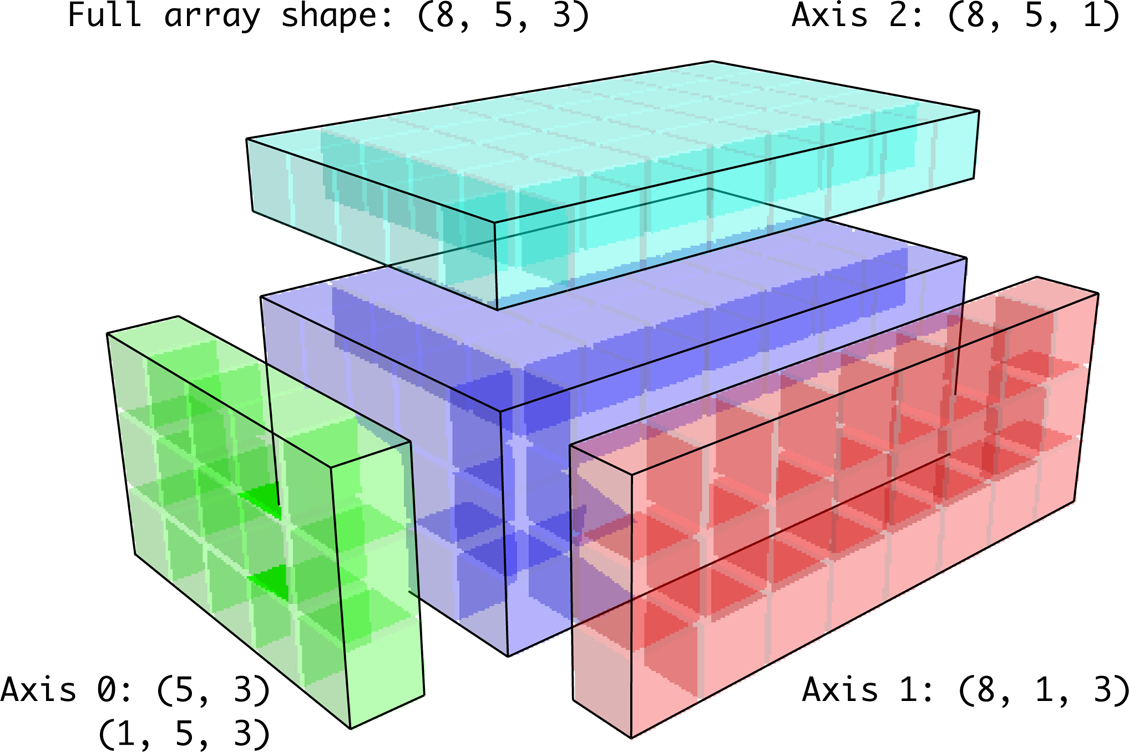

In [95]:
Image("images/broadcast3d.png", width=1000, height=1000)

#### A common issue is needing to add a new axis with length 1 specifically for broadcasting purposes.
#### 'reshape' is an option, but inserting an axis requires constructing a tuple indicating new shape. This can be quite tedious.
#### NumPy arrays offer special syntax 'np.newaxis' which we can use with "full" slices to insert new axis.
#### We can even generalize "demeaning" over an axis without sacrificing performance. But it requires lots of indexing work.

In [97]:
# Adding new axis
arr = np.zeros((4, 4))
arr_3d = arr[:, np.newaxis, :]
arr_3d.shape

(4, 1, 4)

In [98]:
arr_1d = np.random.normal(size=3)
arr_1d[:, np.newaxis]

array([[-1.01879652],
       [ 0.11816453],
       [-1.29511066]])

In [99]:
arr_1d[np.newaxis, :]

array([[-1.01879652,  0.11816453, -1.29511066]])

In [100]:
# Demeaning axis 2 in a 3D array
arr = np.random.randn(3, 4, 5)
depth_means = arr.mean(2)

depth_means

array([[-0.08010598,  0.38483531, -0.09249923,  0.1210798 ],
       [ 0.67287436, -0.44134396, -0.17579773, -0.12343376],
       [ 0.39927106,  0.74153769,  0.24253089, -0.08141809]])

In [101]:
depth_means.shape

(3, 4)

In [102]:
demeaned = arr - depth_means[:, :, np.newaxis]
demeaned.mean(2)

array([[ 1.52655666e-17,  0.00000000e+00, -4.44089210e-17,
        -4.44089210e-17],
       [ 0.00000000e+00, -4.44089210e-17,  1.66533454e-17,
         4.44089210e-17],
       [-2.22044605e-17, -8.88178420e-17, -2.22044605e-17,
        -2.22044605e-17]])

In [103]:
# Generalization of demeaning
def demean_axis(arr, axis=0):
    means = arr.mean(axis)
    
    # This generalizes [:, :, np.newaxis] to N dimensions
    indexer = [slice(None)] * arr.ndim
    indexer[axis] = np.newaxis
    return arr - means[indexer]

### Setting Array Values by Broadcasting
#### The same broadcasting rule governing arithematic operations also applies to setting values via array indexing.
#### But if we have a 1D array that we want to set into columns of the array, we can still do it as long as shape is compatible.

In [106]:
arr = np.zeros((4, 3))
arr[:] = 5
arr

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [107]:
col = np.array([1.28, -0.42, 0.44, 1.6])

arr[:] = col[:, np.newaxis]
arr

array([[ 1.28,  1.28,  1.28],
       [-0.42, -0.42, -0.42],
       [ 0.44,  0.44,  0.44],
       [ 1.6 ,  1.6 ,  1.6 ]])

In [108]:
arr[:2] = [[-1.37], [0.509]]
arr

array([[-1.37 , -1.37 , -1.37 ],
       [ 0.509,  0.509,  0.509],
       [ 0.44 ,  0.44 ,  0.44 ],
       [ 1.6  ,  1.6  ,  1.6  ]])

## Advanced ufunc Usage
#### Although universal functions provide fast element-wise operations, There are a number of additional features that occasionally help write more concise code without loops.

### ufunc Instance Methods
#### Each of NumPy's binary ufuncs has special methods for performing certain kinds of special vectorized operations.
#### 'reduce' takes a single array and aggregates it to its values, optionally along its axis, by performing binary operations. eg - To add elements in an array call 'np.add.reduce'.
#### The starting value depends on the ufunc (0 for add). If an axis is passed, the reduction is done along that axis. This provides concise answers to some questions. eg - 'np.logical_and' can check if values in each row are sorted.
#### 'np.logical_and.reduce' is equivalent to 'all' method.

In [111]:
arr = np.arange(10)
np.add.reduce(arr)

45

In [112]:
arr.sum()

45

In [113]:
np.random.seed(123456)

arr = np.random.randn(5, 5)
arr[::2].sort(1) # Sort some rows

arr[:, :-1] < arr[:, 1:]

array([[ True,  True,  True,  True],
       [ True, False,  True, False],
       [ True,  True,  True,  True],
       [False,  True, False, False],
       [ True,  True,  True,  True]])

In [114]:
np.logical_and.reduce(arr[:, :-1] < arr[:, 1:], axis=1)

array([ True, False,  True, False,  True])

#### 'accumulate' produces an array of the same size with 'intermediate accumulated' values. Like cumsum does for sum.
#### 'outer' performs pairwise cross-product between two arrays. Its output will have a dimension that is sum of the dimensions of inputs.
#### 'reduceat' performs 'local reduce' i.e a 'groupby' in which slices of array are aggregated together. It accepts 'bin edges' which indicate how to split and aggregate values. eg - For [0, 5, 8] reductions are performed over [0:5], [5:8] and [8:].

In [116]:
arr = np.arange(15).reshape((3, 5))
np.add.accumulate(arr, axis=1)

array([[ 0,  1,  3,  6, 10],
       [ 5, 11, 18, 26, 35],
       [10, 21, 33, 46, 60]], dtype=int32)

In [117]:
arr = np.arange(3).repeat([1, 2, 2])
arr

array([0, 1, 1, 2, 2])

In [118]:
np.multiply.outer(arr, np.arange(5))

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8],
       [0, 2, 4, 6, 8]])

In [119]:
x, y = np.random.randn(3, 4), np.random.randn(5)

result = np.subtract.outer(x, y)
result.shape

(3, 4, 5)

In [120]:
arr = np.arange(10)
np.add.reduceat(arr, [0, 5, 8])

array([10, 18, 17], dtype=int32)

In [121]:
arr = np.multiply.outer(np.arange(4), np.arange(5))
arr

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12]])

In [122]:
np.add.reduceat(arr, [0, 2, 4], axis=1)

array([[ 0,  0,  0],
       [ 1,  5,  4],
       [ 2, 10,  8],
       [ 3, 15, 12]], dtype=int32)

### Writing New ufuncs in Python
#### There are many facilities to create your own NumPy ufuncs. Most general is NumPy C API. But here we will focus on pure Python ufuncs.
#### 'numpy.frompyfunc' accepts a Python function along with specification for number of inputs and outputs.
#### Functions created in this way always return arrays of Python objects, which can be inconvinient. But 'numpy.vectorize' allows us to specify output type.
#### These functions allow us to create ufunc-like functions, but they are very slow because they require Python function call to compute each element, which is slower than NumPy's C-based ufunc loops.

In [124]:
def add_elements(x, y):
    return x + y

add_them = np.frompyfunc(add_elements, 2, 1)
add_them(np.arange(8), np.arange(8))

array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object)

In [125]:
# np.vectorize allows to determine output
add_them = np.vectorize(add_elements, otypes=[np.float64])

add_them(np.arange(8), np.arange(8))

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.])

In [126]:
# Python ufuncs are slow
arr = np.random.randn(10000)

% timeit add_them(arr, arr)

1.58 ms ± 17.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [127]:
# Default numpy C based functions, comparatively are very fast
%timeit np.add(arr, arr)

3.77 µs ± 71.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Structured and Record Arrays
#### ndarray is a homogenous data container i.e. each element takes up same number of bytes based on dtype.
#### On surface, this does not allow you to represent heterogenous or tabular-like data.
#### a 'structured' array is an ndarray where each element can be looked at as representing a 'struct' in C or a row in SQL table.

In [132]:
dtype = [('x', np.float64), ('y', np.int32)]

sarr = np.array([(1.5, 6), (np.pi, -2)], dtype=dtype)

sarr

array([(1.5       ,  6), (3.14159265, -2)],
      dtype=[('x', '<f8'), ('y', '<i4')])

#### There are many ways to specify a structured dtype. One way is as list of tuples with '(field_name, field_data_type)'.
#### The elements of such structure are tuple-like objects, whose elements can be accessed like a dictionary.
#### field names are stored in 'dtype.names' attribute. When accessing a field on structured array, strided view is returned, copying nothing.

In [134]:
sarr[0]

(1.5, 6)

In [135]:
sarr[0]['y']

6

In [136]:
sarr['x']

array([1.5       , 3.14159265])

### Nested dtypes and Multidimensional Fields
#### When specifying structured dtype, you can pass a shape (int or tuple).
#### In below example, 'x' refers to an array of length 3 for each record. and accessing "arr['x']" returns a 2D array instead of 1D array.
#### This enables us to express more complicated, nested structures as a single block of memory in an array.
#### pandas DataFrame does not support this feature directly, but it is similar to hierarchical indexing.

In [138]:
# 'x' is 3 elements of int64 and 'y' is 1 element of int32
dtype = [('x', np.int64, 3), ('y', np.int32)]

# 4 records of 'dtype'
arr = np.zeros(4, dtype=dtype)

arr

array([([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0)],
      dtype=[('x', '<i8', (3,)), ('y', '<i4')])

In [139]:
arr[0]['x']

array([0, 0, 0], dtype=int64)

In [140]:
arr['x']

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

In [142]:
dtype = [('x', [('a', 'f8'), ('b', 'f4')]), ('y', np.int32)]

data = np.array([((1, 2), 5), ((3, 4), 6)], dtype=dtype)

data['x']

array([(1., 2.), (3., 4.)], dtype=[('a', '<f8'), ('b', '<f4')])

In [143]:
data['y']

array([5, 6])

In [144]:
data['x']['a']

array([1., 3.])

### Why use Structured Arrays?
#### Compared to pandas DataFrame, NumPy structured arrays are comparatively low-level tool.
#### They provide an opportunity to interpret a block of memory as tabular structure with arbitrarily complex nested columns.
#### As each element in array is represented in memory as fixed number of bytes, structured arrays provide fast and efficient way of writing data to and from disk, transporting over network, etc.
#### In legacy systems, writing data files as fixed-length record byte streams is common way to serialize data in C and C++.
#### As long as file format is known (order, byte size, data type), data can be read into memory with 'np.fromfile'.

## More about Sorting
#### Like 'list' ndarray's instance method 'sort' is an in-place sort i.e array contents are rearranged without creating new array.
#### 1 thing to remember is that if the array is a view on a different ndarray, the original array will also be modified.

In [147]:
arr = np.random.randn(6)
arr.sort()

arr

array([-1.90893859, -0.0998147 ,  0.35584976,  0.43531326,  0.67911044,
        1.2145555 ])

In [148]:
arr = np.random.randn(3, 5)

arr

array([[-0.2625154 ,  0.02812367,  0.87458306,  0.01972901,  1.10790981],
       [ 0.3825507 , -0.5565042 ,  0.78636179, -0.38964038, -0.56135084],
       [-0.1724924 ,  0.24018256, -1.77194708,  0.82789246, -0.77915441]])

In [149]:
# Sort first column
arr[:, 0].sort()

arr

array([[-0.2625154 ,  0.02812367,  0.87458306,  0.01972901,  1.10790981],
       [-0.1724924 , -0.5565042 ,  0.78636179, -0.38964038, -0.56135084],
       [ 0.3825507 ,  0.24018256, -1.77194708,  0.82789246, -0.77915441]])

#### On other hand, 'numpy.sort' creates a new, sorted copy of an array. Else, it can also accept same arguments (eg - 'kind') as 'ndarray.sort'.
#### All the sorting methods take an axis argument for sorting sections of data along passed axis independently.
#### The sort methods do not have the option to sort in descending order. This is a problem, because array slicing produces views, thus not producing a copy or requiring computational work.
#### In this case, the same trick that works for lists ([::-1]) will also work for ndarrays.

In [151]:
arr = np.random.randn(3, 5)
arr

array([[-1.00592983,  1.24347796,  0.70024873,  0.64729809,  0.31218427],
       [-3.05614302,  0.1113004 , -0.01858619,  2.01359289,  0.81407983],
       [-1.23442883,  0.91624336,  0.3461365 , -0.92729173,  0.38947689]])

In [152]:
arr.sort(axis=1)

arr

array([[-1.00592983,  0.31218427,  0.64729809,  0.70024873,  1.24347796],
       [-3.05614302, -0.01858619,  0.1113004 ,  0.81407983,  2.01359289],
       [-1.23442883, -0.92729173,  0.3461365 ,  0.38947689,  0.91624336]])

In [153]:
arr[:, ::-1]

array([[ 1.24347796,  0.70024873,  0.64729809,  0.31218427, -1.00592983],
       [ 2.01359289,  0.81407983,  0.1113004 , -0.01858619, -3.05614302],
       [ 0.91624336,  0.38947689,  0.3461365 , -0.92729173, -1.23442883]])

### Indirect Sorts: argsort and lexsort
#### In some cases you need to reorder datsets by one or more keys. This is an example of 'indirect' sort.
#### Given a key or keys (an array of values or multiple arrays of values) we need to obtain array of integer indices that tells how to reorder data to be in sorted order.
#### 2 methods for this are 'argsort' and 'numpy.lexsort'.

In [155]:
values = np.array([5, 0, 1, 3, 2])

indexer = values.argsort()

indexer

array([1, 2, 4, 3, 0], dtype=int64)

In [156]:
values[indexer]

array([0, 1, 2, 3, 5])

In [157]:
arr = np.random.randn(3, 5)

arr[0] = values

arr

array([[ 5.        ,  0.        ,  1.        ,  3.        ,  2.        ],
       [-0.08944073,  0.68565292, -0.88063003,  1.52901185, -0.43166578],
       [ 0.27258011,  0.44695264, -0.24457814,  0.2242489 , -0.36752189]])

In [158]:
arr[:, arr[0].argsort()]

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  5.        ],
       [ 0.68565292, -0.88063003, -0.43166578,  1.52901185, -0.08944073],
       [ 0.44695264, -0.24457814, -0.36752189,  0.2242489 ,  0.27258011]])

#### 'lexsort' is similar to argsort, but performs indirect/'lexicographical' sort on multiple key arrays.
#### It can be a bit confusing during first use because the order in which keys are used to order data starts with 'last' array passed as parameter.
#### NOTE - pandas methods like 'sort_values' for Series and DataFrame objects are implemented with variants of argsort and lexsort.

In [160]:
first_name = np.array(['Bob', 'Jane', 'Steve', 'Bill','Barbara'])
last_name = np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])

sorter = np.lexsort((first_name, last_name))
sorter

array([1, 2, 3, 0, 4], dtype=int64)

In [161]:
zip(last_name[sorter], first_name[sorter])

### Alternative Sort Algorithms
#### A stable sorting algorithm preserves relative positions of equal elements. This is especially important in indirect sorts where relative ordering is meaningful.
#### The only stable sort available is 'mergesort'. It has a guaranteed 'O(n log n)'performance, but its performance is on average worse than the default 'quicksort' method.

In [163]:
values = np.array(['2:first', '2:second', '1:first', '1:second',
                  '1:third'])
key = np.array([2, 2, 1, 1, 1])

indexer = key.argsort(kind='mergesort')

indexer

array([2, 3, 4, 0, 1], dtype=int64)

In [164]:
values.take(indexer)

array(['1:first', '1:second', '1:third', '2:first', '2:second'],
      dtype='<U8')

#### The table of different sorts with relative performance is shown below -

#### Kind             Speed         Stable       Work space        Worst case
#### 'quicksort'       1               No            0                          O(n^2)
#### 'mergesort'      2              Yes           n / 2                     O(n log n)
#### 'heapsort'        3               No            0                          O(n log n)

### Partially Sorted Arrays
#### A goal of sorting can be to determine the largest or smallest element in an array.
#### NumPy has optimized methods, 'numpy.partition' and 'np.argpartition'for partitioning array around k-th smallest element.
#### eg - For 'partition(arr, 3)', the first 3 elements in the result are smallest 3 elements in no particular order.
#### 'numpy.argpartition' is similar to 'numpy.argsort' and returns indices that rearrange the data into equivalent order.

In [167]:
np.random.seed(12345)
arr = np.random.randn(20)
arr

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057,
        1.39340583,  0.09290788,  0.28174615,  0.76902257,  1.24643474,
        1.00718936, -1.29622111,  0.27499163,  0.22891288,  1.35291684,
        0.88642934, -2.00163731, -0.37184254,  1.66902531, -0.43856974])

In [168]:
np.partition(arr, 3)

array([-2.00163731, -1.29622111, -0.5557303 , -0.51943872, -0.37184254,
       -0.43856974, -0.20470766,  0.28174615,  0.76902257,  0.47894334,
        1.00718936,  0.09290788,  0.27499163,  0.22891288,  1.35291684,
        0.88642934,  1.39340583,  1.96578057,  1.66902531,  1.24643474])

In [169]:
indices = np.argpartition(arr, 3)
indices

array([16, 11,  3,  2, 17, 19,  0,  7,  8,  1, 10,  6, 12, 13, 14, 15,  5,
        4, 18,  9], dtype=int64)

In [170]:
arr.take(indices)

array([-2.00163731, -1.29622111, -0.5557303 , -0.51943872, -0.37184254,
       -0.43856974, -0.20470766,  0.28174615,  0.76902257,  0.47894334,
        1.00718936,  0.09290788,  0.27499163,  0.22891288,  1.35291684,
        0.88642934,  1.39340583,  1.96578057,  1.66902531,  1.24643474])

### numpy.searchsorted: Finding Elements in a Sorted Array
#### 'searchsorted' is an array method that performs a binary search on sorted array, returning location where a value needs to be inserted to maintain sortedness.
#### We can also pass array of values to get array of indices back. 
#### For values that are equal to existing elements, the default behaviour is to return index at left side of group of equal values. We can change this behaviour by passing 'side' argument.

In [172]:
arr = np.array([0, 1, 7, 12, 15])
arr.searchsorted(9)

3

In [173]:
arr.searchsorted([0, 8, 11, 16])

array([0, 3, 3, 5], dtype=int64)

In [174]:
# Search for Equal values
arr = np.array([0, 0, 0, 1, 1, 1, 1])

arr.searchsorted([0, 1])

array([0, 3], dtype=int64)

In [175]:
# Change default behaviour
arr.searchsorted([0, 1], side='right')

array([3, 7], dtype=int64)

#### Another application for searchsorted is to bin data using a seperate array of 'bucket edges'.
#### We then use searchsorted to get a label of which interval each data point belonged to.
#### This, combined with pandas's 'groupby' can be used to bin data.

In [177]:
data = np.floor(np.random.uniform(0, 10000, size=50))
bins = np.array([0, 100, 1000, 5000, 10000])

data

array([9940., 6768., 7908., 1709.,  268., 8003., 9037.,  246., 4917.,
       5262., 5963.,  519., 8950., 7282., 8183., 5002., 8101.,  959.,
       2189., 2587., 4681., 4593., 7095., 1780., 5314., 1677., 7688.,
       9281., 6094., 1501., 4896., 3773., 8486., 9110., 3838., 3154.,
       5683., 1878., 1258., 6875., 7996., 5735., 9732., 6340., 8884.,
       4954., 3516., 7142., 5039., 2256.])

In [178]:
labels = bins.searchsorted(data)
labels

array([4, 4, 4, 3, 2, 4, 4, 2, 3, 4, 4, 2, 4, 4, 4, 4, 4, 2, 3, 3, 3, 3,
       4, 3, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4,
       4, 3, 3, 4, 4, 3], dtype=int64)

In [180]:
import pandas as pd

pd.Series(data).groupby(labels).mean()

2     498.000000
3    3064.277778
4    7389.035714
dtype: float64

### Writing Fast NumPy Functions with Numba
#### Numba is an open source project that creates fast functions for NumPy-like data using CPUs, GPUs or other hardware.
#### It uses the 'LLVM Project' to translate Python code into compiled machine code.
#### A simple function that computes '(x - y).mean()' using a for loop is very slow in pure Python version. The NumPy version is over 100 times faster.
#### But when we convert the function into compiled Numba function using 'numba.jit' (also can be compiled as decorator). The resulting function is faster than vectorized NumPy version.

In [182]:
# Pure Python function

def mean_distance(x, y):
    nx = len(x)
    result = 0.0
    count = 0
    for i in range(nx):
        result += x[i] - y[i]
        count += 1
    return result / count

In [183]:
# Comparison between NumPy and Pure Python
x = np.random.randn(10000000)
y = np.random.randn(10000000)

# Pure Python
%timeit mean_distance(x, y)

3.75 s ± 41.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [184]:
# NumPy version
%timeit (x - y).mean()

49 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [185]:
# Compiling pure Python into Numba
import numba as nb

numba_mean_distance = nb.jit(mean_distance)

In [186]:
# # Can also be compiled as decorator
# @nb.jit
# def mean_distance(x, y):
#     nx = len(x)
#     result = 0.0
#     count = 0
#     for i in range(nx):
#         result += x[i] - y[i]
#         count += 1
#     return result / count

In [187]:
# Numba function faster than NumPy
%timeit numba_mean_distance(x, y)

13.2 ms ± 268 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Numba cannot compile arbitrary Python code, but it does support significant subset of pure Python that is usefule for writing numerical algorithms.
#### Numba is a deep library, supporting many kinds of hardware, modes of compilation, and user extensions.
#### It can also compile substantial subset of NumPy Python API without explicit for loops.
#### It can also recognize constructs that can be compiled to machine code, while substituting calls to CPython API that it does not know how to compile.
#### Its 'jit' function also has the option 'nopython=True', which restricts allowed code to Python code that can be compiled to LLVM without any Python C API calls. 'jit(nopython=True)' has a shorter alias 'numba.njit'.

In [190]:
# Same code in shorter form
from numba import float64, njit

@njit(float64(float64[:], float64[:]))
def mean_distance(x, y):
    return (x - y).mean()

## Advanced Array Input and Output
#### Just like 'np.save' and 'np.load' are used for storing and retrieving arrays in binary format on disk, there are number of additional options for more sophisticated use.
#### 'Memory maps' in particular have additional benefir of enabling to work with datasetstaht do not fit into RAM.

### Memory-Mapped Files
#### A 'memory-mapped' file is a method for interacting with binary data on disk as though it is in-memory.
#### NumPy implements 'memmap' object that is ndarray-like, enabling small segments of large file to be read and written without reading whole array into memory.
#### Also, memmap has same methods as in-memory array and can be substituted into many algorithms where ndarray is expected.

#### To create a memmap, use the method 'np.memmap' and pass a file path, stype, shape and file mode.
#### Slicing a memmap will return views on the data on disk.
#### If you assign data to memmap, it will be buffered in memory (like Python file object). You can write it to disk by calling 'flush'.
#### When a memmap falls out of scope and is garbage-collected, any changes will be flushed to disk also.
#### When opening existing memmap, we still have to specify dtype and shape as the file is only a block of binary data with no metadata on disk.
#### memmap also work with structured or nested dtypes.

In [194]:
mmap = np.memmap('mymmap', dtype='float64', mode='w+',
                shape=(10000, 10000))
mmap

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [195]:
section = mmap[:5]

In [196]:
section[:] = np.random.randn(5, 10000)

mmap.flush()

mmap

memmap([[ 1.37140985,  0.93127837,  0.60573747, ..., -0.62115557,
         -0.46780136,  0.47874865],
        [ 0.42296545,  0.83060431,  0.69976547, ...,  1.28831447,
          0.58858679, -1.42755372],
        [ 2.16005954, -1.24616489,  2.44470054, ...,  0.86866129,
          0.28019716,  2.13008671],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

In [197]:
del mmap

In [199]:
mmap = np.memmap('mymmap', dtype='float64', shape=(10000, 10000))
mmap

memmap([[ 1.37140985,  0.93127837,  0.60573747, ..., -0.62115557,
         -0.46780136,  0.47874865],
        [ 0.42296545,  0.83060431,  0.69976547, ...,  1.28831447,
          0.58858679, -1.42755372],
        [ 2.16005954, -1.24616489,  2.44470054, ...,  0.86866129,
          0.28019716,  2.13008671],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

### HDF5 and Other Array Storage Options
#### PyTables and h5py are 2 projects that provide NumPy-friendly interfaces for storing array data in efficient and compressible HDF5 (Hierarchical Data Format) format.
#### We can store hundreds of gigabytes or even terabytes of data in HDF5 format.

## Performance Tips
#### Getting good performance out of code using NumPy is quite straightforward, as array operations typically replace otherwise  slow pure Python loops.
#### Some things to keep in mind:
####     1. Convert Python loops and conditional logic to array operations and boolean array operations
####     2. Use broadcasting whenever possible.
####     3. Use array views (slicing) to avoid copying data
####     4. Utilize ufuncs and ufunc methods
#### If you do not get the required performance after exhausting all of the above options, consider writing code in C, Fortran or Cython.
#### Cython provides an easy way to get C-like performance with minimal development.

### The Importance of Contiguous Memory
#### Memory layout of an array can significantly affect the speed of computations.
#### This is based partly on performance differences related to cache hierarchy of the CPU. 
#### So, operations accessing contiguous blocks of memory will generally be fastest because memory subsystems will buffer appropriate blocks of memory into ultrafast L1 or L2 CPU cache.
#### Also certain code paths inside NumPy's C codebase have been optimized for contiguous case in which generic strided memory accesses can be avoided.

#### By saying that an array's memory layout is contiguous means that the elements are stored in memory in the same order they appear in array with respect to Fortran (column major) or C (row major).
#### By default, NumPy arrays are C-contiguous or simply contiguous. A column major array, like a transpose of a C-major array, is thus called Fortran contiguous.
#### These properties can be checked via the 'flags' attribute on ndarray.

In [204]:
arr_c = np.ones((1000, 1000), order='C')
arr_f = np.ones((1000, 1000), order='F')

arr_c.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [205]:
arr_f.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [206]:
arr_f.flags.f_contiguous

True

#### Summing of the rows of the above arrays should, in theory, be faster for arr_c than arr_f since rows are contiguous in memory. But the difference looks very slight.
#### But if you want to squeeze more performance out of NumPy, this is a good place for some effort.
#### If an array does not have the right order, you can use 'copy' and pass either 'C' or 'F' based on requirement.
#### When constructing a view on an array, keep in mind that the result is not guaranteed to be contiguous.

In [210]:
# Performance difference between C and F major arrays

%timeit arr_c.sum(1)

744 µs ± 28.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [211]:
%timeit arr_f.sum(1)

632 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [212]:
# Copying array with a particular order
arr_f.copy('C').flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [213]:
arr_c[:50].flags.contiguous

True

In [214]:
arr_c[:, :50].flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False